In [1]:
def dist(x, y):
    # assert x == y, "vector must be of the same dimension"
    dist = 0
    for i in range(len(x)):
        dist += (x[i] - y[i])**2
    return dist

In [2]:
def centre(X):
    p = len(X[0])
    centre = [0]*p
    for x in X:
        for j in range(p):
            centre[j] += x[j]/(len(X))
    return centre

In [3]:
def calculer_centres(classes):
    centres = [] 
    for c in classes:
        centres.append(centre(c))
    return centres

In [4]:
def plus_proche(x, centres):
    nearest = dist(x, centres[0]), 0
    for i in range(1, (len(centres))): #len(centres) = k
        nearest = min(nearest, (dist(x, centres[i]), i))
    return nearest[1]

# ou

def plus_proche_v2(x, centres):
    return min(range(len(centres)), key = lambda i: dist(x, centres[i]))


In [5]:
def calculer_classes(X, centres):
    classes = [[] for _  in range(len(centres))]
    for x in X:
        classes[plus_proche(x, centres)].append(x)
    return classes

In [6]:
def kmeans(X, centres):
    centres_after = None
    classes = None
    while centres != centres_after: 
        centres_after = centres
        classes = calculer_classes(X, centres)
        centres_after = calculer_centres(classes)
    return classes

def kmeans_rec(X, centres):
    classes = calculer_classes(X, centres)
    centres_temp = calculer_centres(classes)
    if centres_temp == centres:
        return centres
    else:
        return kmeans_rec(X, centres_temp)

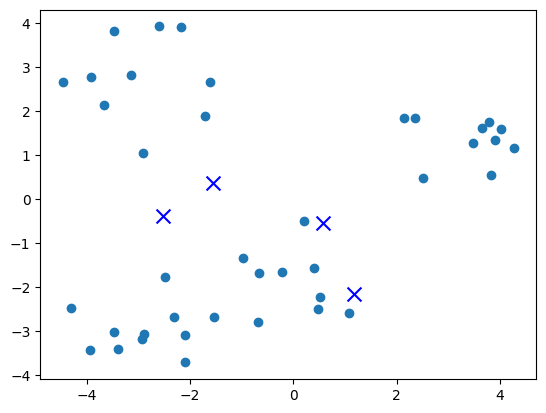

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

k, dim = 4, 2
X = np.vstack([np.array(p + np.random.randn(10, dim)) for p in [[3, 2], [0, -2], [-3, 3], [-3, -3]]]).tolist()
centres = (np.random.rand(k, dim)*6 - 3).tolist()
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.scatter([x[0] for x in centres], [x[1] for x in centres], marker='x', s=100, c='b')
plt.show()

In [8]:
classes = kmeans(X, centres) # test de kmeans

cmap = ListedColormap(['r', 'g', 'b', 'purple'])
centres = calculer_centres(classes)
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[plus_proche(x, centres) for x in X], cmap=cmap)
plt.scatter([x[0] for x in centres], [x[1] for x in centres], marker='x', s=100, c=range(k), cmap=cmap)
plt.show()

KeyboardInterrupt: 